#### This notebook trains our baseline model

Imports

In [1]:
import os
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'
import torch
from torch import nn
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
os.chdir("../models")
from model import CustomCNN
from common_utils import set_seed, EarlyStopper, train, get_mean_rgb, CustomTransform

# set seed
set_seed(42)

Initialise model and dataset

In [2]:
model = CustomCNN() # initialise model

transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize(mean=get_mean_rgb(datasets.Flowers102(root='../data', split='test', download=True, transform=transforms.ToTensor())), std=[1,1,1])
])

# load data
train_dataset = datasets.Flowers102(root='../data', split='test', download=True, transform=transform) 
val_dataset = datasets.Flowers102(root='../data', split='val', download=True, transform=transform) 
test_dataset = datasets.Flowers102(root='../data', split='train', download=True, transform=transform)
# NOTE: Due to a bug with the Flowers102 dataset, the train and test splits are swapped

batch_size = 128
# initialise dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Specify hyperparameters

In [6]:
lr = 0.001 # learning rate
optimiser = torch.optim.Adam(model.parameters(), lr=lr) # initialise optimiser
loss = torch.nn.CrossEntropyLoss() # initialise loss function

if torch.cuda.is_available(): # nvidia gpu
    device = torch.device("cuda")
elif torch.backends.mps.is_available(): # apple gpu
    device = torch.device("mps")
else:
    device = torch.device("cpu")
model.to(device)

epochs = 300 # number of epochs
early_stopper = EarlyStopper(patience=25) # initialise early stopper


# Make directory to save baseline model
baseline_model_path = "./saved_models/baseline_model/non_preprocessed"
if not os.path.exists(baseline_model_path):
    os.makedirs(baseline_model_path, exist_ok=True)

# Define the device-specific path
device_type = None
if device == torch.device("cuda"):
    device_type = "cuda"
elif device == torch.device("mps"):
    device_type = "mps"
else:
    device_type = "cpu"

# Construct the full path
device_path = os.path.join(baseline_model_path, device_type)

# Create the directory if it doesn't exist
if not os.path.exists(device_path):
    os.mkdir(device_path)

Train the model

In [7]:
train_loss_list, val_loss_list, val_acc_list = train(model, train_dataloader, val_dataloader, optimiser, loss, device, epochs, early_stopper, device_path) # train model

Epoch 1/300:   0%|          | 0/49 [00:00<?, ?it/s]

/Users/adrian/miniconda3/envs/sc4001/lib/python3.8/site-packages/torch/nn/functional.py:2563: UserWarning: The operator 'aten::avg_pool3d.out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  div = avg_pool3d(div, (size, 1, 1), stride=1).squeeze(1)
Epoch 1/300: 100%|██████████| 49/49 [03:02<00:00,  3.73s/it, Training loss=4.4714]


Epoch 1/300 took 195.46s | Train loss: 4.4714 | Val loss: 4.7270 | Val accuracy: 1.08% | EarlyStopper count: 0


Epoch 2/300: 100%|██████████| 49/49 [03:00<00:00,  3.67s/it, Training loss=4.3360]


Epoch 2/300 took 194.56s | Train loss: 4.3360 | Val loss: 4.5582 | Val accuracy: 1.96% | EarlyStopper count: 0


Epoch 3/300: 100%|██████████| 49/49 [02:52<00:00,  3.52s/it, Training loss=4.0562]


Epoch 3/300 took 184.28s | Train loss: 4.0562 | Val loss: 4.4835 | Val accuracy: 2.25% | EarlyStopper count: 0


Epoch 4/300: 100%|██████████| 49/49 [02:48<00:00,  3.44s/it, Training loss=3.8849]


Epoch 4/300 took 180.14s | Train loss: 3.8849 | Val loss: 4.3053 | Val accuracy: 2.16% | EarlyStopper count: 0


Epoch 5/300: 100%|██████████| 49/49 [02:46<00:00,  3.40s/it, Training loss=3.7498]


Epoch 5/300 took 178.18s | Train loss: 3.7498 | Val loss: 3.9760 | Val accuracy: 5.78% | EarlyStopper count: 0


Epoch 6/300: 100%|██████████| 49/49 [02:46<00:00,  3.40s/it, Training loss=3.5752]


Epoch 6/300 took 178.18s | Train loss: 3.5752 | Val loss: 3.8756 | Val accuracy: 5.10% | EarlyStopper count: 0


Epoch 7/300: 100%|██████████| 49/49 [02:57<00:00,  3.61s/it, Training loss=3.4036]


Epoch 7/300 took 189.29s | Train loss: 3.4036 | Val loss: 3.6562 | Val accuracy: 8.92% | EarlyStopper count: 0


Epoch 8/300: 100%|██████████| 49/49 [02:53<00:00,  3.54s/it, Training loss=3.2047]


Epoch 8/300 took 185.28s | Train loss: 3.2047 | Val loss: 3.4662 | Val accuracy: 11.67% | EarlyStopper count: 0


Epoch 9/300: 100%|██████████| 49/49 [02:48<00:00,  3.44s/it, Training loss=3.0637]


Epoch 9/300 took 180.73s | Train loss: 3.0637 | Val loss: 3.3367 | Val accuracy: 15.10% | EarlyStopper count: 0


Epoch 10/300: 100%|██████████| 49/49 [02:53<00:00,  3.54s/it, Training loss=2.9498]


Epoch 10/300 took 185.23s | Train loss: 2.9498 | Val loss: 3.2304 | Val accuracy: 16.76% | EarlyStopper count: 0


Epoch 11/300: 100%|██████████| 49/49 [02:51<00:00,  3.49s/it, Training loss=2.8198]


Epoch 11/300 took 183.25s | Train loss: 2.8198 | Val loss: 3.3885 | Val accuracy: 13.92% | EarlyStopper count: 0


Epoch 12/300: 100%|██████████| 49/49 [02:52<00:00,  3.53s/it, Training loss=2.8509]


Epoch 12/300 took 184.88s | Train loss: 2.8509 | Val loss: 3.0043 | Val accuracy: 21.08% | EarlyStopper count: 1


Epoch 13/300: 100%|██████████| 49/49 [02:51<00:00,  3.51s/it, Training loss=2.6846]


Epoch 13/300 took 184.46s | Train loss: 2.6846 | Val loss: 3.0830 | Val accuracy: 21.18% | EarlyStopper count: 0


Epoch 14/300: 100%|██████████| 49/49 [02:49<00:00,  3.46s/it, Training loss=2.5754]


Epoch 14/300 took 181.95s | Train loss: 2.5754 | Val loss: 2.9930 | Val accuracy: 22.25% | EarlyStopper count: 1


Epoch 15/300: 100%|██████████| 49/49 [02:50<00:00,  3.48s/it, Training loss=2.5593]


Epoch 15/300 took 182.74s | Train loss: 2.5593 | Val loss: 2.9005 | Val accuracy: 24.71% | EarlyStopper count: 0


Epoch 16/300: 100%|██████████| 49/49 [02:50<00:00,  3.48s/it, Training loss=2.3943]


Epoch 16/300 took 182.74s | Train loss: 2.3943 | Val loss: 2.8636 | Val accuracy: 26.18% | EarlyStopper count: 0


Epoch 17/300: 100%|██████████| 49/49 [02:49<00:00,  3.46s/it, Training loss=2.3136]


Epoch 17/300 took 181.71s | Train loss: 2.3136 | Val loss: 2.6292 | Val accuracy: 28.82% | EarlyStopper count: 0


Epoch 18/300: 100%|██████████| 49/49 [02:49<00:00,  3.46s/it, Training loss=2.1601]


Epoch 18/300 took 181.45s | Train loss: 2.1601 | Val loss: 2.5654 | Val accuracy: 32.16% | EarlyStopper count: 0


Epoch 19/300: 100%|██████████| 49/49 [02:49<00:00,  3.46s/it, Training loss=2.0672]


Epoch 19/300 took 181.67s | Train loss: 2.0672 | Val loss: 2.4865 | Val accuracy: 34.51% | EarlyStopper count: 0


Epoch 20/300: 100%|██████████| 49/49 [02:49<00:00,  3.46s/it, Training loss=1.9490]


Epoch 20/300 took 181.62s | Train loss: 1.9490 | Val loss: 2.5385 | Val accuracy: 35.20% | EarlyStopper count: 0


Epoch 21/300: 100%|██████████| 49/49 [02:53<00:00,  3.53s/it, Training loss=1.9060]


Epoch 21/300 took 184.93s | Train loss: 1.9060 | Val loss: 2.4779 | Val accuracy: 36.08% | EarlyStopper count: 1


Epoch 22/300: 100%|██████████| 49/49 [02:53<00:00,  3.55s/it, Training loss=1.7700]


Epoch 22/300 took 185.44s | Train loss: 1.7700 | Val loss: 2.4554 | Val accuracy: 38.14% | EarlyStopper count: 0


Epoch 23/300: 100%|██████████| 49/49 [02:49<00:00,  3.46s/it, Training loss=1.6495]


Epoch 23/300 took 181.22s | Train loss: 1.6495 | Val loss: 2.2837 | Val accuracy: 40.39% | EarlyStopper count: 0


Epoch 24/300: 100%|██████████| 49/49 [02:46<00:00,  3.41s/it, Training loss=1.5593]


Epoch 24/300 took 178.84s | Train loss: 1.5593 | Val loss: 2.4249 | Val accuracy: 40.10% | EarlyStopper count: 0


Epoch 25/300: 100%|██████████| 49/49 [02:49<00:00,  3.45s/it, Training loss=1.4446]


Epoch 25/300 took 180.72s | Train loss: 1.4446 | Val loss: 2.2711 | Val accuracy: 42.65% | EarlyStopper count: 1


Epoch 26/300: 100%|██████████| 49/49 [02:49<00:00,  3.46s/it, Training loss=1.3008]


Epoch 26/300 took 181.42s | Train loss: 1.3008 | Val loss: 2.2451 | Val accuracy: 44.22% | EarlyStopper count: 0


Epoch 27/300: 100%|██████████| 49/49 [02:48<00:00,  3.44s/it, Training loss=1.2095]


Epoch 27/300 took 180.85s | Train loss: 1.2095 | Val loss: 2.2907 | Val accuracy: 44.22% | EarlyStopper count: 0


Epoch 28/300: 100%|██████████| 49/49 [02:47<00:00,  3.41s/it, Training loss=1.0995]


Epoch 28/300 took 178.87s | Train loss: 1.0995 | Val loss: 2.3615 | Val accuracy: 43.73% | EarlyStopper count: 1


Epoch 29/300: 100%|██████████| 49/49 [02:50<00:00,  3.48s/it, Training loss=1.1022]


Epoch 29/300 took 182.48s | Train loss: 1.1022 | Val loss: 2.3715 | Val accuracy: 44.41% | EarlyStopper count: 2


Epoch 30/300: 100%|██████████| 49/49 [02:51<00:00,  3.50s/it, Training loss=0.9633]


Epoch 30/300 took 183.28s | Train loss: 0.9633 | Val loss: 2.4228 | Val accuracy: 44.80% | EarlyStopper count: 3


Epoch 31/300: 100%|██████████| 49/49 [02:56<00:00,  3.59s/it, Training loss=0.8820]


Epoch 31/300 took 188.68s | Train loss: 0.8820 | Val loss: 2.3687 | Val accuracy: 44.80% | EarlyStopper count: 4


Epoch 32/300: 100%|██████████| 49/49 [03:00<00:00,  3.69s/it, Training loss=0.8087]


Epoch 32/300 took 193.16s | Train loss: 0.8087 | Val loss: 2.5708 | Val accuracy: 45.39% | EarlyStopper count: 5


Epoch 33/300: 100%|██████████| 49/49 [02:53<00:00,  3.54s/it, Training loss=0.7716]


Epoch 33/300 took 185.35s | Train loss: 0.7716 | Val loss: 2.4671 | Val accuracy: 46.76% | EarlyStopper count: 6


Epoch 34/300: 100%|██████████| 49/49 [02:57<00:00,  3.62s/it, Training loss=0.6789]


Epoch 34/300 took 189.64s | Train loss: 0.6789 | Val loss: 2.4688 | Val accuracy: 47.06% | EarlyStopper count: 7


Epoch 35/300: 100%|██████████| 49/49 [02:51<00:00,  3.50s/it, Training loss=0.7178]


Epoch 35/300 took 183.45s | Train loss: 0.7178 | Val loss: 2.6303 | Val accuracy: 46.86% | EarlyStopper count: 8


Epoch 36/300: 100%|██████████| 49/49 [02:52<00:00,  3.51s/it, Training loss=0.6027]


Epoch 36/300 took 184.11s | Train loss: 0.6027 | Val loss: 2.4703 | Val accuracy: 48.63% | EarlyStopper count: 9


Epoch 37/300: 100%|██████████| 49/49 [02:56<00:00,  3.59s/it, Training loss=0.5372]


Epoch 37/300 took 188.15s | Train loss: 0.5372 | Val loss: 2.7696 | Val accuracy: 47.45% | EarlyStopper count: 10


Epoch 38/300: 100%|██████████| 49/49 [02:55<00:00,  3.58s/it, Training loss=0.5086]


Epoch 38/300 took 187.32s | Train loss: 0.5086 | Val loss: 2.6110 | Val accuracy: 48.53% | EarlyStopper count: 11


Epoch 39/300: 100%|██████████| 49/49 [02:51<00:00,  3.51s/it, Training loss=0.4404]


Epoch 39/300 took 183.99s | Train loss: 0.4404 | Val loss: 2.7230 | Val accuracy: 47.55% | EarlyStopper count: 12


Epoch 40/300: 100%|██████████| 49/49 [02:55<00:00,  3.59s/it, Training loss=0.4397]


Epoch 40/300 took 187.62s | Train loss: 0.4397 | Val loss: 2.7454 | Val accuracy: 49.31% | EarlyStopper count: 13


Epoch 41/300: 100%|██████████| 49/49 [02:52<00:00,  3.53s/it, Training loss=0.4451]


Epoch 41/300 took 184.84s | Train loss: 0.4451 | Val loss: 2.6105 | Val accuracy: 49.61% | EarlyStopper count: 14


Epoch 42/300: 100%|██████████| 49/49 [02:57<00:00,  3.62s/it, Training loss=0.4351]


Epoch 42/300 took 189.82s | Train loss: 0.4351 | Val loss: 2.8187 | Val accuracy: 49.12% | EarlyStopper count: 15


Epoch 43/300: 100%|██████████| 49/49 [02:56<00:00,  3.61s/it, Training loss=0.5888]


Epoch 43/300 took 188.94s | Train loss: 0.5888 | Val loss: 2.8047 | Val accuracy: 47.75% | EarlyStopper count: 16


Epoch 44/300: 100%|██████████| 49/49 [02:55<00:00,  3.58s/it, Training loss=0.3809]


Epoch 44/300 took 187.41s | Train loss: 0.3809 | Val loss: 2.8406 | Val accuracy: 49.61% | EarlyStopper count: 17


Epoch 45/300: 100%|██████████| 49/49 [02:57<00:00,  3.61s/it, Training loss=0.3604]


Epoch 45/300 took 189.10s | Train loss: 0.3604 | Val loss: 2.7953 | Val accuracy: 49.12% | EarlyStopper count: 18


Epoch 46/300: 100%|██████████| 49/49 [02:56<00:00,  3.61s/it, Training loss=0.3141]


Epoch 46/300 took 188.72s | Train loss: 0.3141 | Val loss: 2.9845 | Val accuracy: 49.80% | EarlyStopper count: 19


Epoch 47/300: 100%|██████████| 49/49 [02:54<00:00,  3.57s/it, Training loss=0.2977]


Epoch 47/300 took 186.77s | Train loss: 0.2977 | Val loss: 3.0527 | Val accuracy: 50.59% | EarlyStopper count: 20


Epoch 48/300: 100%|██████████| 49/49 [02:52<00:00,  3.53s/it, Training loss=0.3452]


Epoch 48/300 took 184.97s | Train loss: 0.3452 | Val loss: 2.8747 | Val accuracy: 51.47% | EarlyStopper count: 21


Epoch 49/300: 100%|██████████| 49/49 [02:52<00:00,  3.53s/it, Training loss=0.2673]


Epoch 49/300 took 185.07s | Train loss: 0.2673 | Val loss: 3.0912 | Val accuracy: 48.24% | EarlyStopper count: 22


Epoch 50/300: 100%|██████████| 49/49 [02:59<00:00,  3.66s/it, Training loss=0.2807]


Epoch 50/300 took 191.37s | Train loss: 0.2807 | Val loss: 2.9879 | Val accuracy: 49.02% | EarlyStopper count: 23


Epoch 51/300: 100%|██████████| 49/49 [02:54<00:00,  3.56s/it, Training loss=0.4725]


Epoch 51/300 took 186.22s | Train loss: 0.4725 | Val loss: 2.9575 | Val accuracy: 48.14% | EarlyStopper count: 24
Early stopping


Plot train, test loss and test accuracy

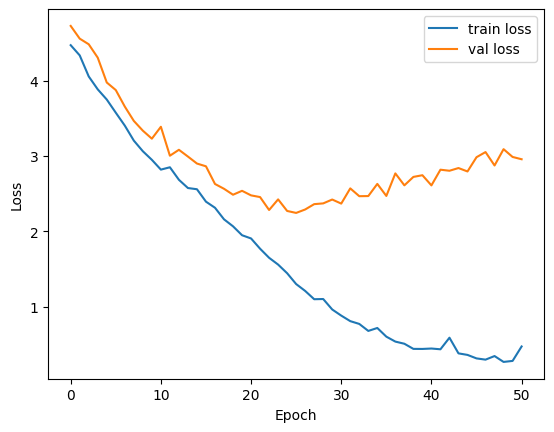

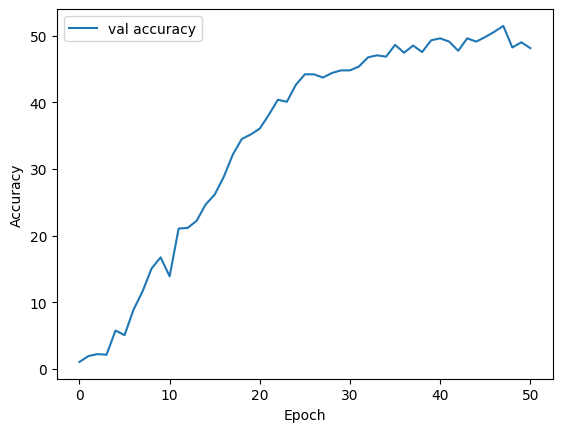

In [8]:
# plot the graphs
import matplotlib.pyplot as plt
plt.plot(train_loss_list, label="train loss")
plt.plot(val_loss_list, label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(val_acc_list, label="val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()